In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_df = pd.merge(mouse_metadata, study_results, how="right", on="Mouse ID")

# Display the data table for preview
complete_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [26]:
# Checking the number of mice.
number_of_mice = complete_df['Mouse ID'].nunique()
number_of_mice

249

In [27]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = complete_df.loc[complete_df.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [28]:
duplicateid = complete_df.loc[complete_df["Mouse ID"] == "g989",:]
duplicateid

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [29]:
clean_df = complete_df.loc[complete_df["Mouse ID"] != "g989",:]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [30]:
number_of_clean_mice = clean_df['Mouse ID'].nunique()
number_of_clean_mice

248

In [31]:
#Summary Statistics

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
meantv = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
mediantv = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
vartv = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stdtv = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
semtv = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summary_df = pd.DataFrame({"Mean Tumor Volume":meantv,
                           "Median Tumor Volume":mediantv,
                          "Tumor Volume Variance":vartv,
                          "Tumor Volume Std. Dev.":stdtv,
                          "Tumor Volume Std. Err.":semtv})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [33]:
#Bar and Pie Charts

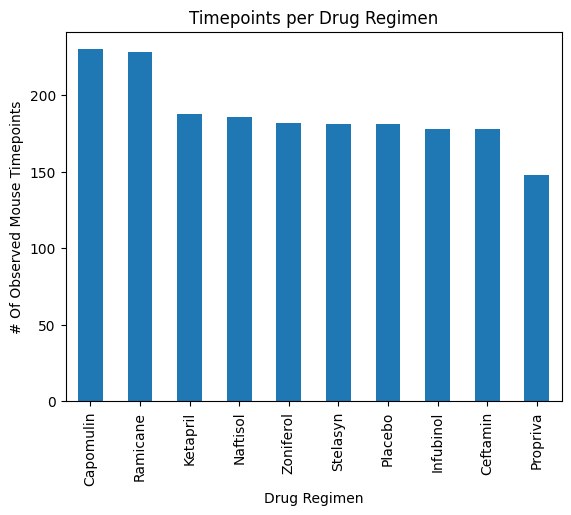

In [34]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_counts = clean_df["Drug Regimen"].value_counts().plot(kind="bar")
plt.ylabel('# Of Observed Mouse Timepoints')
plt.title("Timepoints per Drug Regimen")
plt.show()

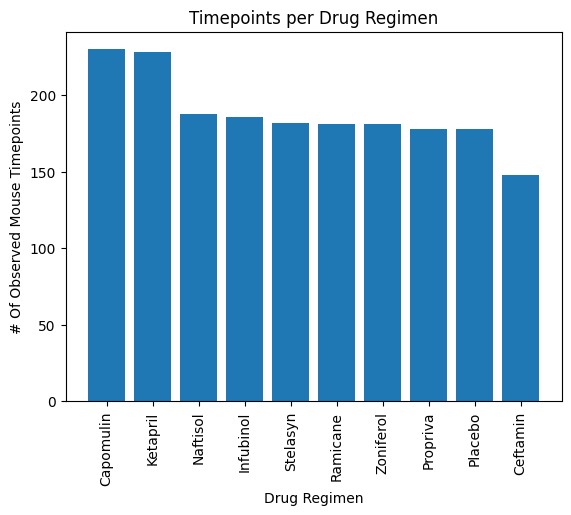

In [35]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = clean_df["Drug Regimen"].unique().tolist()
mouseidandtime = clean_df["Drug Regimen"].value_counts()
plt.bar(x_axis, mouseidandtime)
plt.xlabel('Drug Regimen')
plt.ylabel('# Of Observed Mouse Timepoints')
plt.title("Timepoints per Drug Regimen")
plt.xticks(rotation=90)
plt.show()

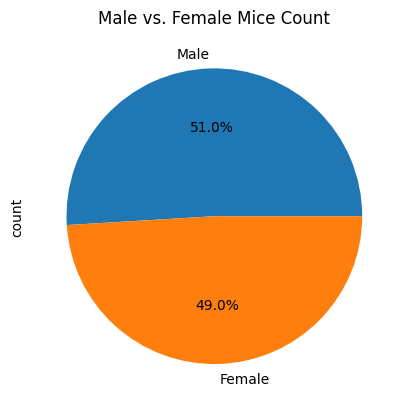

In [36]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
mice_genders = clean_df["Sex"].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title("Male vs. Female Mice Count")
plt.show()

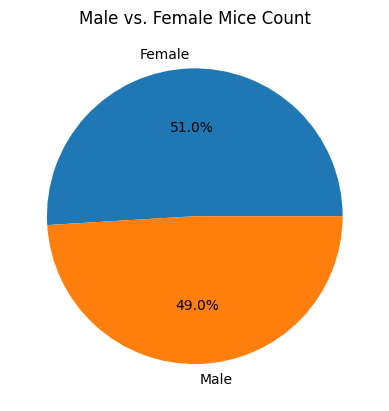

In [37]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
labels = clean_df["Sex"].unique().tolist()
gendercounts = clean_df["Sex"].value_counts()
# Make the pie chart
plt.pie(gendercounts, labels=labels, autopct='%1.1f%%')
plt.title("Male vs. Female Mice Count")
plt.show()


In [38]:
#Quartiles, Outliers and Boxplots

In [39]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_df = pd.merge(last_timepoint, clean_df, on=['Mouse ID', 'Timepoint'])
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_treatments = final_tumor_df[final_tumor_df['Drug Regimen'].isin(treatments)]
tumor_volumes = []
# for loop for each treatment
for treatment in treatments:
# get tumor volumes
    volumes = final_treatments.loc[final_treatments['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_volumes.append(volumes)
 
# calculate quartiles and iqr
    quartiles = volumes.quantile([0.25, 0.5, 0.75])
    iqr = quartiles[0.75] - quartiles[0.25]
 
# calculate bounds
    l_bound = quartiles[0.25] - (1.5 * iqr)
    u_bound = quartiles[0.75] + (1.5 * iqr)
 
# find the outliers
    outliers = volumes[(volumes < l_bound) | (volumes > u_bound)]

# print treatment, iqr and bounds
    print(f"\nTreatment: {treatment}, IQR: {iqr:.2f}, lower bound: {l_bound:.2f}, upper bound: {u_bound:.2f}")
# if there is an outlier print outlier data
    if len(outliers) > 0:
        print(f"Number of outliers: {len(outliers)}")
        print(f"Outlier values: {outliers.values}")
# if there is no outlier print no outlier 
    if len(outliers) == 0:
        print("No potential outliers identified")





Treatment: Capomulin, IQR: 7.78, lower bound: 20.70, upper bound: 51.83
No potential outliers identified

Treatment: Ramicane, IQR: 9.10, lower bound: 17.91, upper bound: 54.31
No potential outliers identified

Treatment: Infubinol, IQR: 11.48, lower bound: 36.83, upper bound: 82.74
Number of outliers: 1
Outlier values: [36.3213458]

Treatment: Ceftamin, IQR: 15.58, lower bound: 25.36, upper bound: 87.67
No potential outliers identified


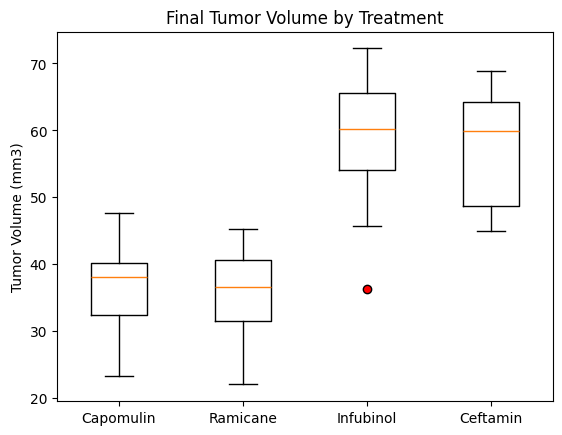

In [40]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
box = plt.boxplot(tumor_volumes, tick_labels=treatments, flierprops={'marker':'o', 'markerfacecolor':'red'})
plt.title('Final Tumor Volume by Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [41]:
#Line and Scatter Plots

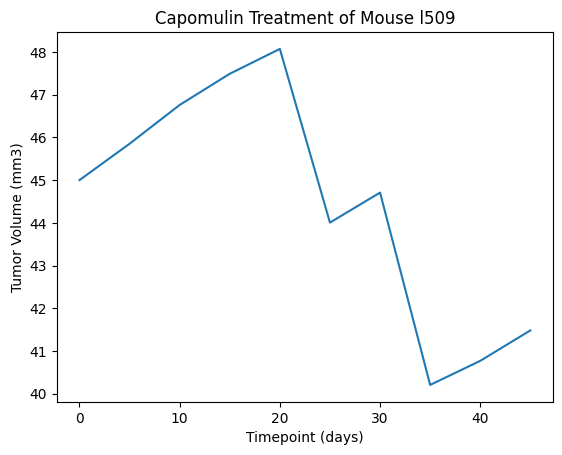

In [42]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

indexbydrug = clean_df.set_index(["Drug Regimen"])
x_axis_values = clean_df.loc[(clean_df["Mouse ID"] == "l509"), "Timepoint"]
x_axis = x_axis_values.tolist()
y_axis_values = clean_df.loc[(clean_df["Mouse ID"] == "l509"), "Tumor Volume (mm3)"]
y_axis = y_axis_values.tolist()
plt.plot(x_axis, y_axis)
plt.title('Capomulin Treatment of Mouse l509')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel("Timepoint (days)")
plt.show()

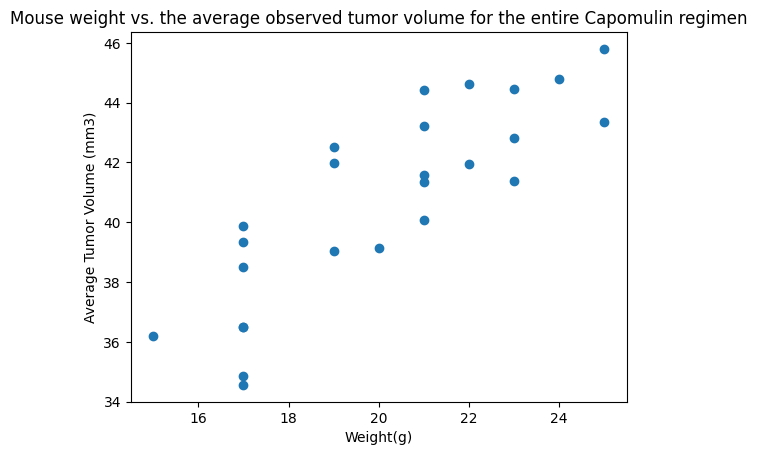

In [43]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
avgerage_tumor_vol = capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weights = capomulin.groupby('Mouse ID')['Weight (g)'].first()
plt.scatter(mouse_weights, avgerage_tumor_vol)
plt.title("Mouse weight vs. the average observed tumor volume for the entire Capomulin regimen")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

The correlation between mouse weight and the average tumor volume is 0.84


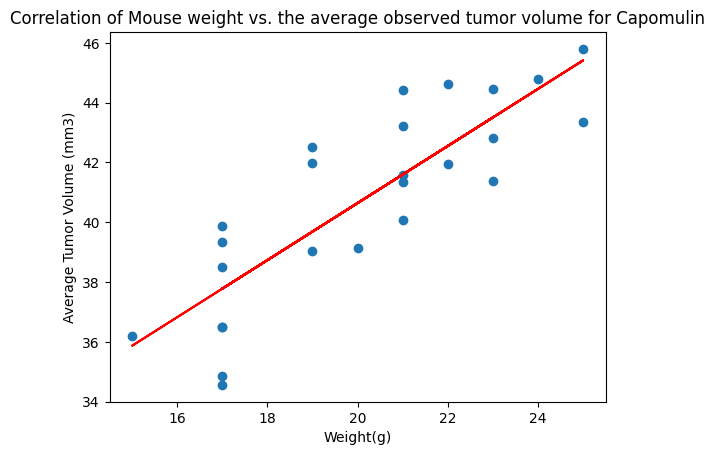

In [44]:
# Correlation and Regression
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr = st.pearsonr(mouse_weights, avgerage_tumor_vol)
print(f"The correlation between mouse weight and the average tumor volume is {round(corr[0],2)}")

(slope, intercept, r_value, p_value, std_err) = st.linregress(mouse_weights, avgerage_tumor_vol)
regress_values = mouse_weights * slope + intercept
plt.scatter(mouse_weights, avgerage_tumor_vol)
plt.plot(mouse_weights, regress_values, color = 'red')
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Correlation of Mouse weight vs. the average observed tumor volume for Capomulin")
plt.show()